In [1]:
import pandas as pd

# Load clean dataset
df = pd.read_csv("../player_clean.csv")

df.shape, df.columns

((570, 48),
 Index(['full_name', 'age', 'birthday', 'birthday_gmt', 'league', 'season',
        'position', 'current_club', 'minutes_played_overall',
        'minutes_played_home', 'minutes_played_away', 'nationality',
        'appearances_overall', 'appearances_home', 'appearances_away',
        'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
        'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
        'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
        'conceded_overall', 'conceded_home', 'conceded_away',
        'yellow_cards_overall', 'red_cards_overall',
        'goals_involved_per_90_overall', 'assists_per_90_overall',
        'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
        'min_per_goal_overall', 'conceded_per_90_overall',
        'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
        'min_per_assist_overall', 'cards_per_90_overall',
        'rank_in_league_top_attackers',

In [2]:
X = df[["age", "minutes_played_overall",
        "appearances_overall", "assists_overall", "position"]]
y = df["goals_overall"]

X.head()

,age,minutes_played_overall,appearances_overall,assists_overall,position
0,32,1589,20,1,Defender
1,35,1217,16,1,Midfielder
2,32,2327,29,1,Midfielder
3,31,1327,28,6,Midfielder
4,22,69,2,0,Forward


In [3]:
X_encoded = pd.get_dummies(X, columns=["position"], drop_first=True)
X_encoded.head()

,age,minutes_played_overall,appearances_overall,assists_overall,position_Forward,position_Goalkeeper,position_Midfielder
0,32,1589,20,1,False,False,False
1,35,1217,16,1,False,False,True
2,32,2327,29,1,False,False,True
3,31,1327,28,6,False,False,True
4,22,69,2,0,True,False,False


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((456, 7), (114, 7))

In [5]:
import sklearn
print(sklearn.__version__)

1.7.1


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred = model.predict(X_test)

# Step 3: Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1.6107876800630436, 2.161198248940162, 0.5510249318461435)

In [7]:
df["goals_per_appearance"] = df["goals_overall"] / df["appearances_overall"]
df["assists_per_appearance"] = df["assists_overall"] / df["appearances_overall"]
df["minutes_per_appearance"] = df["minutes_played_overall"] / \
    df["appearances_overall"]
df["age_squared"] = df["age"] ** 2
df["is_forward"] = df["position"].apply(lambda x: 1 if "Forward" in x else 0)

# Replace infinities and NaNs from division by 0
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(inplace=True)

df[["goals_per_appearance", "assists_per_appearance",
    "minutes_per_appearance", "age_squared", "is_forward"]].head()

,goals_per_appearance,assists_per_appearance,minutes_per_appearance,age_squared,is_forward
0,0.000000,0.050000,79.450000,1024,0
1,0.062500,0.062500,76.062500,1225,0
2,0.103448,0.034483,80.241379,1024,0
3,0.142857,0.214286,47.392857,961,0
4,0.000000,0.000000,34.500000,484,1


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
features = [
    "age",
    "minutes_played_overall",
    "appearances_overall",
    "assists_overall",
    "position",
    "goals_per_appearance",
    "assists_per_appearance",
    "minutes_per_appearance",
    "age_squared",
    "is_forward"
]

X = df[features]
y = df["goals_overall"]

# Encode categorical
X_encoded = pd.get_dummies(X, columns=["position"], drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict + Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(0.862007393592012, 1.3085980890941729, 0.8647719595556196)

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf

(0.141980198019802, np.float64(0.4049397950606515), 0.9870510334577095)

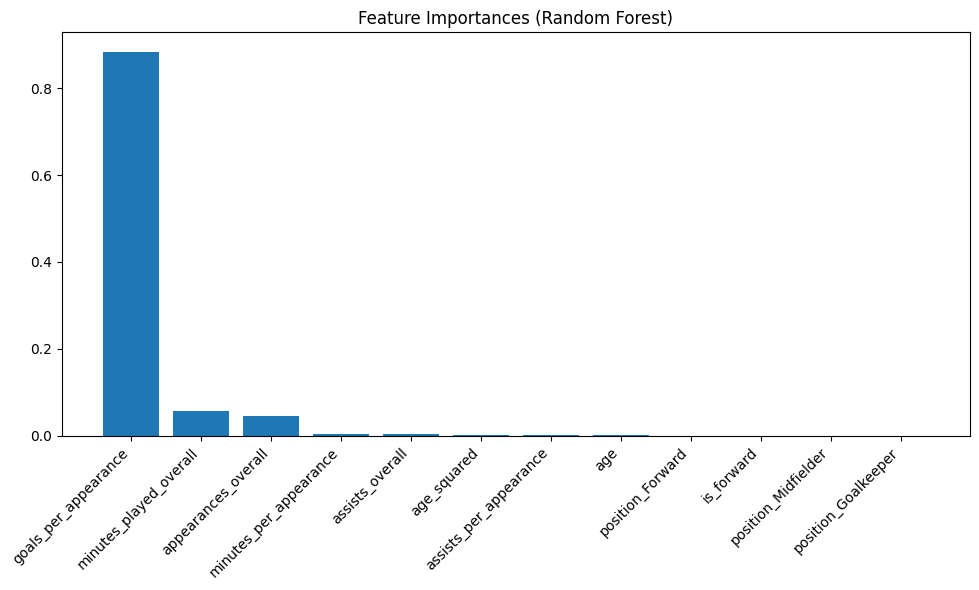

In [ ]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_encoded.columns

# Sort and plot
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)),
           feature_names[indices], rotation=45, ha='right')
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()



In [15]:
import os

# Create 'model' directory if it doesn't exist
os.makedirs("model", exist_ok=True)

In [16]:
import joblib

# Save model and feature columns
joblib.dump(rf_model, "model/random_forest_goals_model.pkl")
joblib.dump(X_encoded.columns.tolist(), "model/feature_columns.pkl")

['model/feature_columns.pkl']